In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tips-dataset/tipsdataset.csv


In [2]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error      
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [3]:
df= pd.read_csv("/kaggle/input/tips-dataset/tipsdataset.csv")
df.head(3)

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [4]:
#null value check
df.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

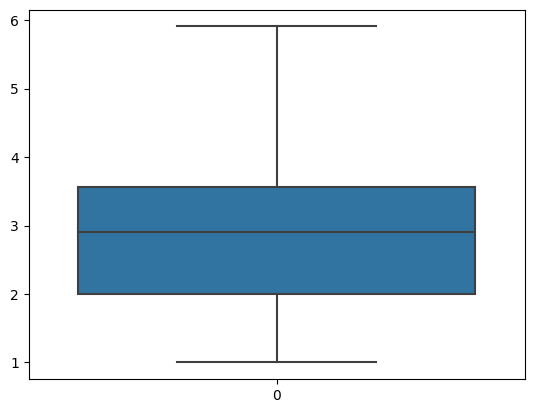

In [5]:
#outliers value check
q1 = df["tip"].quantile(0.25)
q3 = df["tip"].quantile(0.75)
iqr=q3-q1
top_limit = q3+1.5*iqr
outliers=df["tip"]>top_limit
df.loc[outliers,"tip"]=top_limit

sns.boxplot(df["tip"])
plt.show()

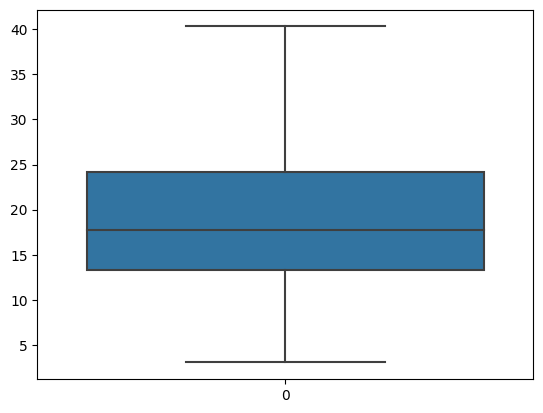

In [6]:
#outliers value check

q1 = df["total_bill"].quantile(0.25)
q3 = df["total_bill"].quantile(0.75)
iqr=q3-q1
top_limit = q3+1.5*iqr
outliers=df["total_bill"]>top_limit
df.loc[outliers,"total_bill"]=top_limit

sns.boxplot(df["total_bill"])
plt.show()

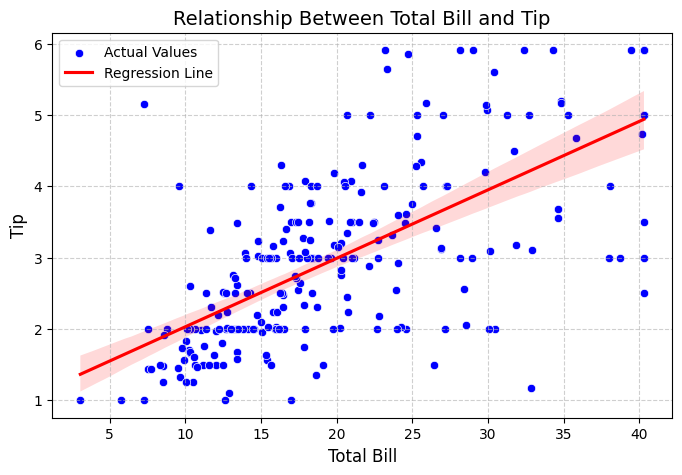

In [7]:
plt.figure(figsize=(8, 5))

# Scatter plot for actual values
sns.scatterplot(x='total_bill', y='tip', data=df, color='blue', label='Actual Values')

# Regression line without scatter points
sns.regplot(x='total_bill', y='tip', data=df, scatter=False, color='red', label='Regression Line')

# Title and labels
plt.title("Relationship Between Total Bill and Tip", fontsize=14)
plt.xlabel("Total Bill", fontsize=12)
plt.ylabel("Tip", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

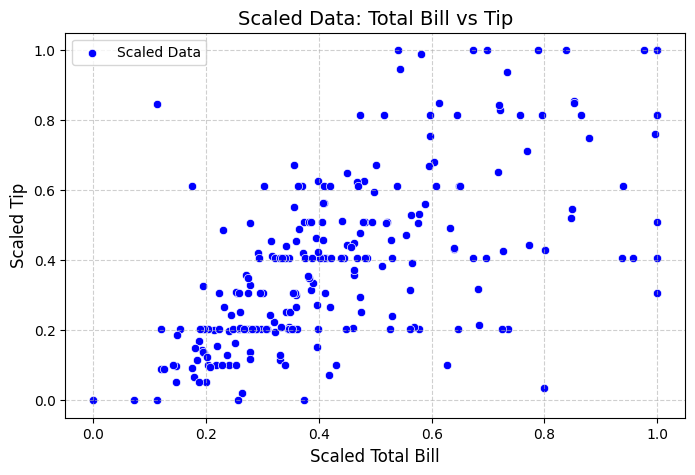

In [8]:
# outliers value check with min max scaler
scaler = MinMaxScaler()
df[['tip', 'total_bill']] = scaler.fit_transform(df[['tip', 'total_bill']])

# Grafik
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=df, color='blue', label='Scaled Data')

plt.title("Scaled Data: Total Bill vs Tip", fontsize=14)
plt.xlabel("Scaled Total Bill", fontsize=12)
plt.ylabel("Scaled Tip", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

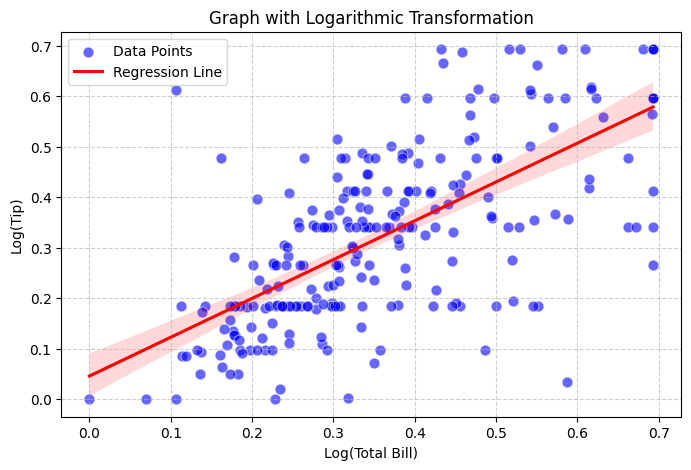

In [9]:
# outliers value check with log

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=np.log1p(df['total_bill']), 
    y=np.log1p(df['tip']), 
    color='blue', 
    alpha=0.6, 
    s=60, 
    label='Data Points'
)

sns.regplot(
    x=np.log1p(df['total_bill']), 
    y=np.log1p(df['tip']), 
    scatter=False, 
    color='red', 
    label='Regression Line'
)

plt.title("Graph with Logarithmic Transformation")
plt.xlabel("Log(Total Bill)")
plt.ylabel("Log(Tip)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [10]:
df.dtypes

total_bill    float64
tip           float64
gender         object
smoker         object
day            object
time           object
size            int64
dtype: object

In [11]:
# Onehot coding
df = pd.get_dummies(df, columns=["gender", "smoker", "day", "time"], drop_first=True).astype(float)
df.head(3)


,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.373917,0.002038,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.195286,0.134522,3.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.481902,0.509554,3.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: >

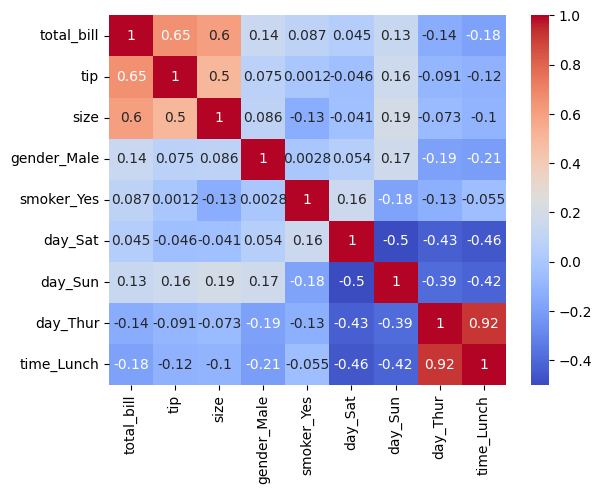

In [12]:
#corelation_matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [13]:
# define x and y values
y=df["tip"]
x=df.drop(["tip"],axis=1)

In [14]:
#define train test data 
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22 , random_state=42)


In [15]:
#Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)

predict=lr.predict(x_test)

df=pd.DataFrame({"RealValue":y_test , "Tahmin":predict})
df.head(10)

,RealValue,Tahmin
24,0.444331,0.364708
6,0.203822,0.239519
153,0.203822,0.591935
211,0.847898,0.535737
198,0.203822,0.259046
176,0.203822,0.358223
192,0.317962,0.504816
124,0.309809,0.277399
9,0.454522,0.335299
101,0.407643,0.310535


In [16]:
#error metrics
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.12860943666884853
Mean Squared Error (MSE): 0.025622202445836854
Root Mean Squared Error (RMSE): 0.16006936760616272


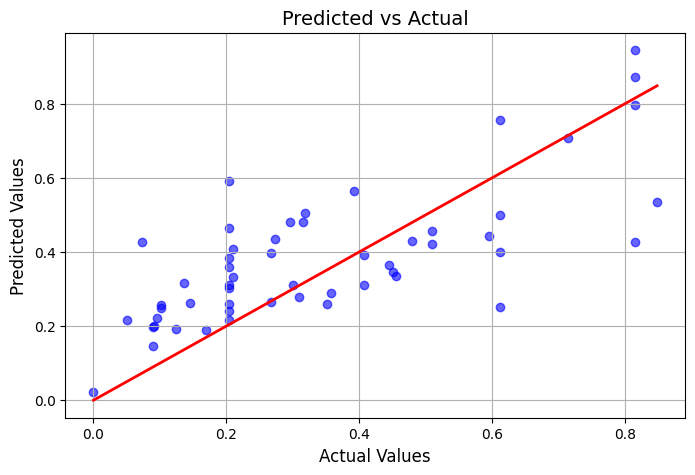

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predict, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Predicted vs Actual', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()